In [36]:
# -- load data sets 
import pandas as pd
import requests
import io

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter

In [2]:
from messycharts import messychart


In [3]:
from importlib import reload
import messycharts 
reload(messycharts)

from messycharts import messychart

In [4]:
# -- load data set 
url = "https://messari-reports.dustinteander.repl.co/dataset/layer-1/chain_data"
csv = requests.get(url).content
chain_df = pd.read_csv(io.StringIO(csv.decode('utf-8')))

In [5]:
chain_df

date     chain           tvl          mcap  active_addrs  \
0     2021-01-01  Ethereum  1.745434e+10  8.403769e+10      441169.0   
1     2021-01-02  Ethereum  1.748414e+10  8.329408e+10      420530.0   
2     2021-01-03  Ethereum  1.786076e+10  8.859535e+10      488930.0   
3     2021-01-04  Ethereum  1.964954e+10  1.125254e+11      511899.0   
4     2021-01-05  Ethereum  2.052667e+10  1.166932e+11      504191.0   
...          ...       ...           ...           ...           ...   
6415  2022-09-30    Cosmos  1.460903e+09  6.071959e+09       39068.0   
6416  2022-10-01    Cosmos  1.463993e+09  6.057635e+09       34239.0   
6417  2022-10-02    Cosmos  1.460954e+09  5.959704e+09       34001.0   
6418  2022-10-03    Cosmos  1.451446e+09  5.774019e+09       27846.0   
6419  2022-10-04    Cosmos  1.490113e+09  6.107549e+09           NaN   

           txns   twitter  stable_supply  
0     1126605.0  548211.0   1.959873e+10  
1     1159038.0  550791.0   1.989801e+10  
2     1220944.0  553813.0   2.000850e+10  
3     1260300.0  556815.0   2.021060e+10  
4     1244603.0  562561.0   2.012580e+10  
...         ...       ...            ...  
6415   154596.0  470129.0            NaN  
6416   133972.0  470268.0            NaN  
6417   148829.0  470740.0            NaN  
6418   106558.0  471045.0            NaN  
6419        NaN       NaN            NaN  

[6420 rows x 8 columns]

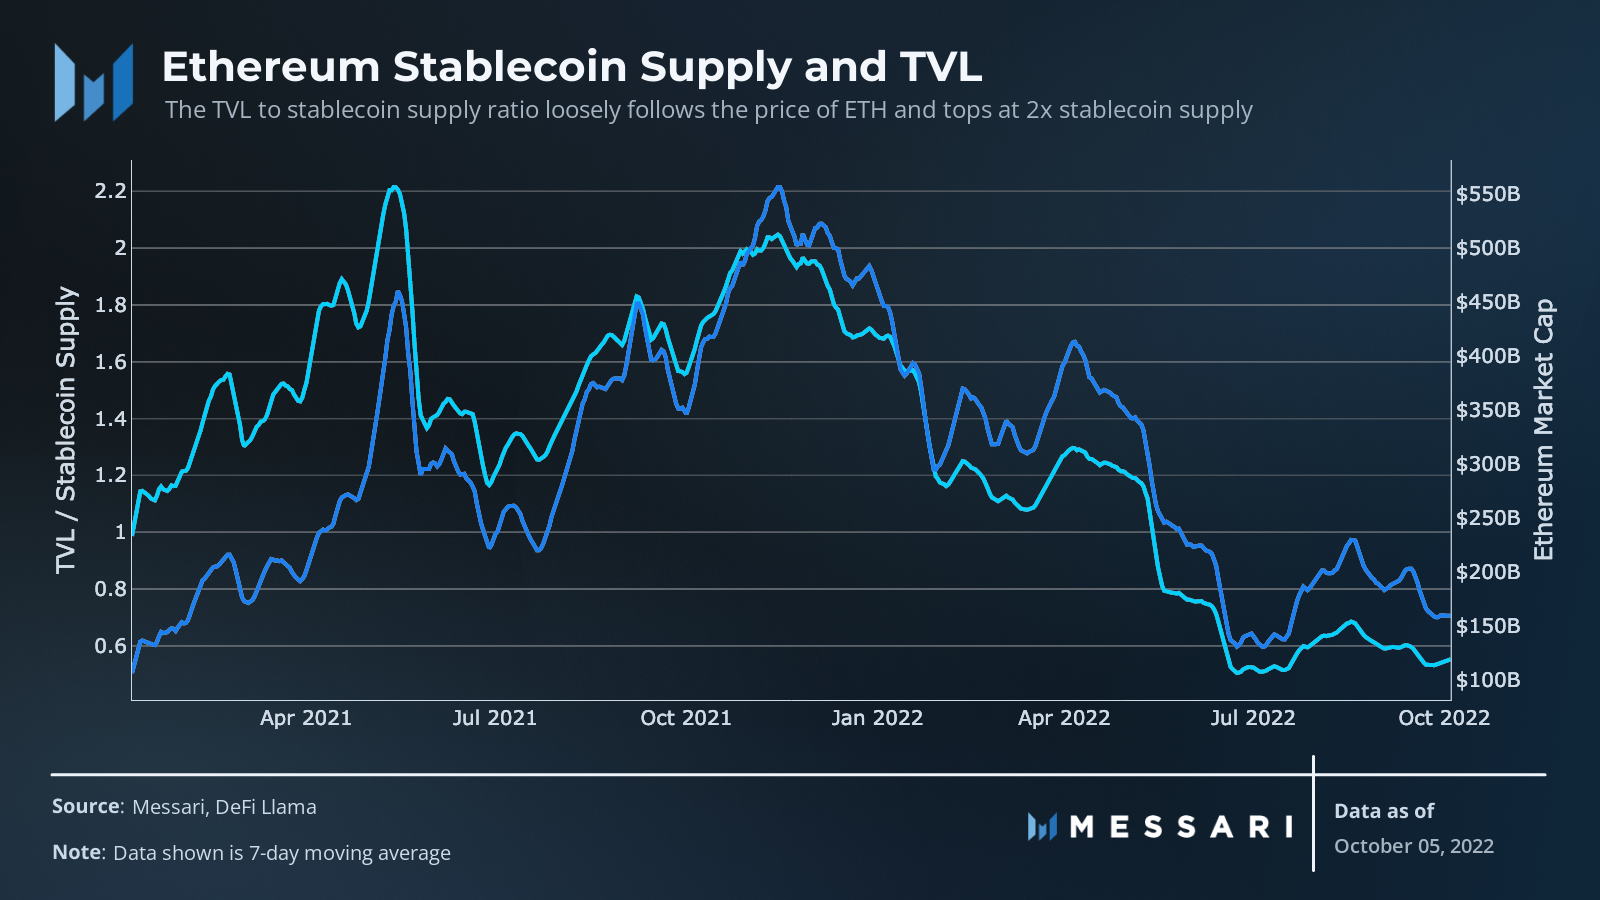

In [68]:
# -- plot TVL to supply 
chain = 'Ethereum'
ma = 7

# -- filter df 
plot_df = chain_df[chain_df['chain'] == chain].groupby('date')[['tvl', 'stable_supply', 'mcap']].sum().rolling(ma).mean().dropna()

# -- create new column tvl / supply 
plot_df['tvl/supply'] = plot_df['tvl'] / plot_df['stable_supply']

# -- drop stable supply and tvl col
plot_df = plot_df.drop(columns=['stable_supply', 'tvl']) 

# -- initialize chart
chart = messychart(plot_df)

# -- define titles
chart.title = 'Ethereum Stablecoin Supply and TVL'
chart.subtitle = 'The TVL to stablecoin supply ratio loosely follows the price of ETH and tops at 2x stablecoin supply'
chart.source = 'Messari, DeFi Llama'
chart.note = 'Data shown is 7-day moving average'

# -- set secondary color 
chart.secondary_color = "#1B80F3" # 1B80F3 231DC5

# -- set colors 
chart.colors = ['#00D1FF', '#00D1FF', '#00D1FF']

# -- line chart  
chart.filepath = '../charts/stable-stability-eth-tvl.png'

chart.create_slide(chart_type = 'line', 
                    axis_title= 'TVL / Stablecoin Supply',          # -- define y axis title 
                    yaxis_data_type = 'numeric',       # -- defines the type: can be ['numeric', 'dollar', 'percent']. default is numeric 
                    legend_layout = 'None',   # -- defines the legend style and placement. options are ['bottom', 'right', 'right_values', 'None']
                    secondary_column = 'mcap',     # -- define which column to be the secondary axis 
                    secondary_axis_title = 'Ethereum Market Cap', # -- define the secondary axis title 
                    secondary_data_type= 'dollar',   # -- defines the data type of the secondary axis
                    show_secondary = False,            # -- controls whether to show item in legend 
                    digits=1)                         # -- defines the number of digits in the y axis and the legend (if right_values)

display(chart.slide)


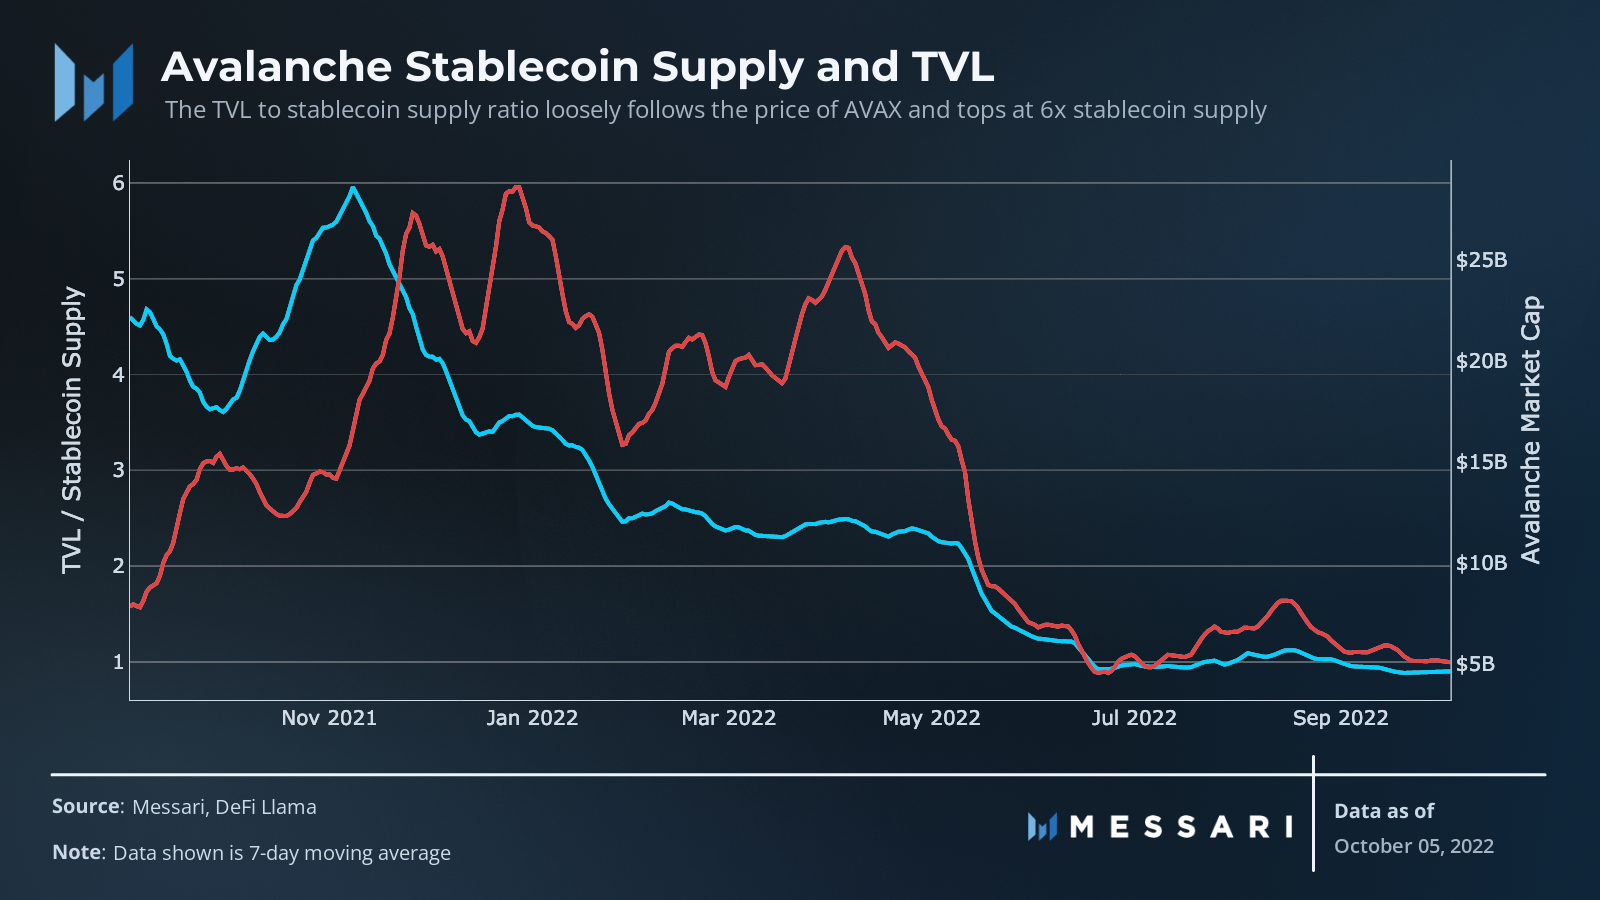

In [22]:
# -- filter df for avalanche chain 
plot_df = chain_df[chain_df['chain'] == 'Avalanche'].groupby('date')[['tvl', 'stable_supply', 'mcap']].sum().rolling(ma).mean().dropna()

# -- create new column tvl / supply
plot_df['tvl/supply'] = plot_df['tvl'] / plot_df['stable_supply']

# -- drop stable supply and tvl col
plot_df = plot_df.drop(columns=['stable_supply', 'tvl'])

# -- filter df starting from sep 2021
plot_df = plot_df[plot_df.index > '2021-09-01']

# -- create chart 
chart = messychart(plot_df)

# -- define titles
chart.title = 'Avalanche Stablecoin Supply and TVL'
chart.subtitle = 'The TVL to stablecoin supply ratio loosely follows the price of AVAX and tops at 6x stablecoin supply'
chart.source = 'Messari, DeFi Llama'
chart.note = 'Data shown is 7-day moving average'

# -- set secondary color
chart.secondary_color = "#E84142"

# -- set colors
chart.colors = ['#00D1FF', '#00D1FF', '#00D1FF']

# -- line chart
chart.filepath = '../charts/stable-stability-avax-tvl.png'

chart.create_slide(chart_type = 'line',
                    axis_title= 'TVL / Stablecoin Supply',          # -- define y axis title
                    yaxis_data_type = 'numeric',       # -- defines the type: can be ['numeric', 'dollar', 'percent']. default is numeric
                    legend_layout = 'None',   # -- defines the legend style and placement. options are ['bottom', 'right', 'right_values', 'None']
                    secondary_column = 'mcap',     # -- define which column to be the secondary axis
                    secondary_axis_title = 'Avalanche Market Cap', # -- define the secondary axis title
                    secondary_data_type= 'dollar',   # -- defines the data type of the secondary axis
                    show_secondary = False,            # -- controls whether to show item in legend
                    digits=1)                         # -- defines the number of digits in the y axis and the legend (if right_values)

display(chart.slide)


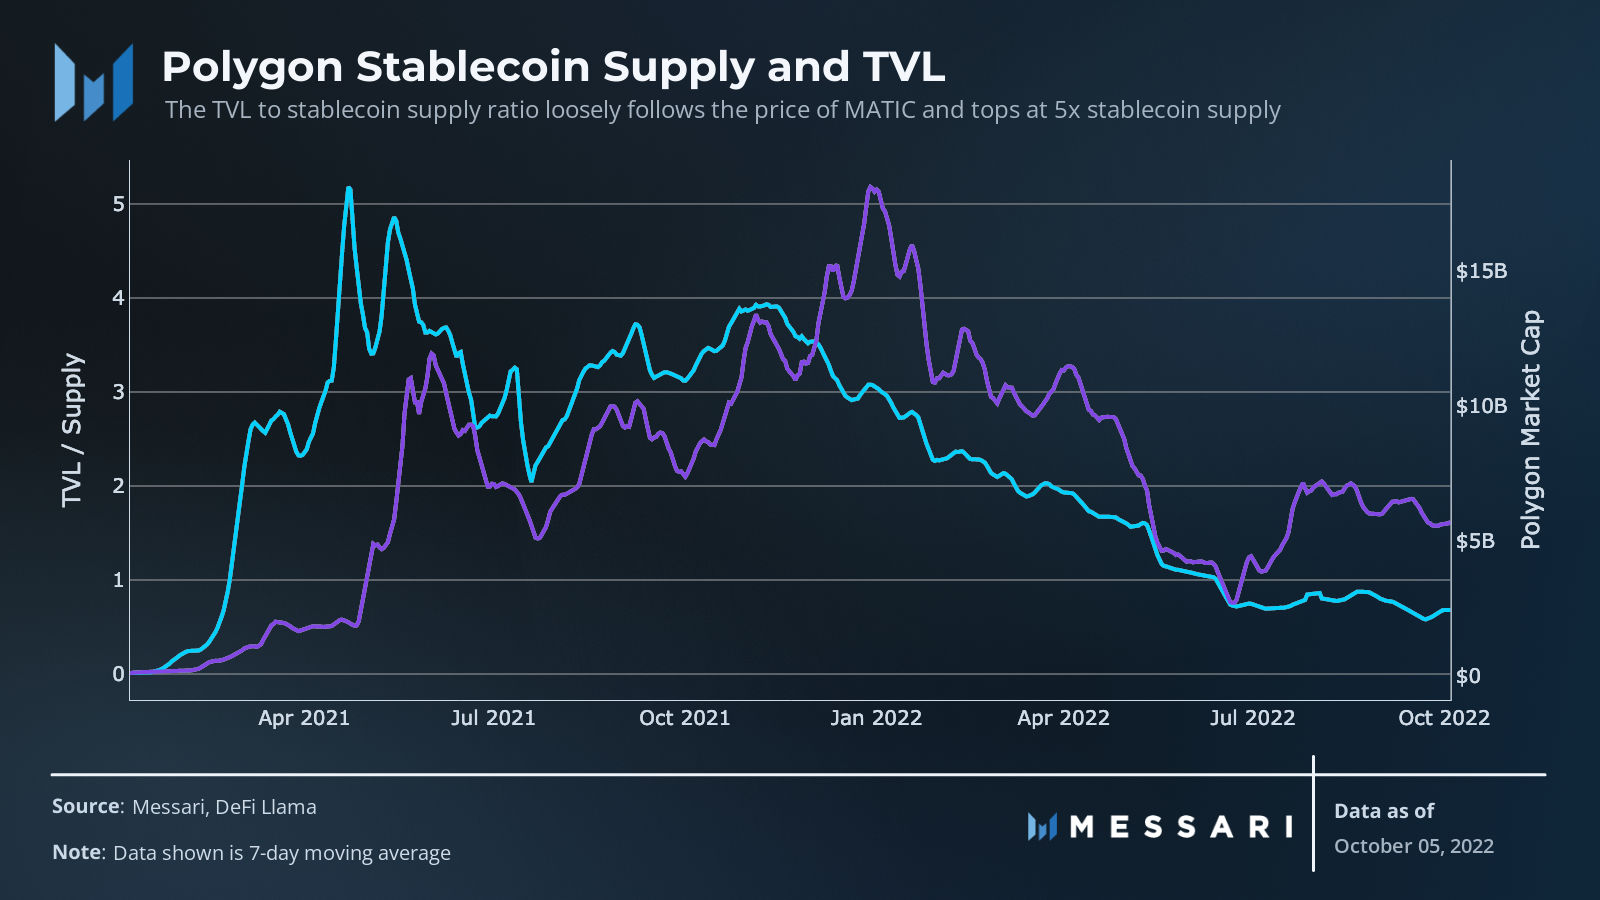

In [19]:

ma = 7
# -- filter df for polygon chain
plot_df = chain_df[chain_df['chain'] == 'Polygon'].groupby('date')[['tvl', 'stable_supply', 'mcap']].sum().rolling(ma).mean().dropna()

# -- create new column tvl / supply
plot_df['tvl/supply'] = plot_df['tvl'] / plot_df['stable_supply']

# -- drop stable supply and tvl col
plot_df = plot_df.drop(columns=['stable_supply', 'tvl'])

# -- initialize chart
chart = messychart(plot_df)

# -- define titles
chart.title = 'Polygon Stablecoin Supply and TVL'
chart.subtitle = 'The TVL to stablecoin supply ratio loosely follows the price of MATIC and tops at 5x stablecoin supply'
chart.source = 'Messari, DeFi Llama'
chart.note = 'Data shown is 7-day moving average'

# -- set secondary color
chart.secondary_color = "#8247E5"

# -- line chart
chart.filepath = '../charts/stable-stability-matic-tvl.png'

# -- set colors 
chart.colors = ['#00D1FF', '#00D1FF', '#00D1FF']

chart.create_slide(chart_type = 'line',
                    axis_title= 'TVL / Stablecoin Supply',          # -- define y axis title
                    yaxis_data_type = 'numeric',       # -- defines the type: can be ['numeric', 'dollar', 'percent']. default is numeric
                    legend_layout = 'None',   # -- defines the legend style and placement. options are ['bottom', 'right', 'right_values', 'None']
                    secondary_column = 'mcap',     # -- define which column to be the secondary axis
                    secondary_axis_title = 'Polygon Market Cap', # -- define the secondary axis title
                    secondary_data_type= 'dollar',   # -- defines the data type of the secondary axis
                    show_secondary = False,            # -- controls whether to show item in legend
                    digits=1)                         # -- defines the number of digits in the y axis and the legend (if right_values)

display(chart.slide)

In [12]:
plot_df

tvl  stable_supply
date                                   
2021-01-01  1.745434e+10   1.959873e+10
2021-01-02  1.748414e+10   1.989801e+10
2021-01-03  1.786076e+10   2.000850e+10
2021-01-04  1.964954e+10   2.021060e+10
2021-01-05  2.052667e+10   2.012580e+10
...                  ...            ...
2022-09-30  4.826375e+10   8.723446e+10
2022-10-01  4.810006e+10   8.706006e+10
2022-10-02  4.834849e+10   8.704698e+10
2022-10-03  4.763643e+10   8.709759e+10
2022-10-04  4.899343e+10   8.704939e+10

[642 rows x 2 columns]

# -- import data for dex pools 

In [54]:
# -- import dex pool data
joe_df = pd.read_csv('../../datasets/stables/Kero-Stability-Report/Joe-USDC_AVAX.csv')
uni2_df = pd.read_csv('../../datasets/stables/Kero-Stability-Report/uniV2-USDC_ETH.csv')
uni3_df = pd.read_csv('../../datasets/stables/Kero-Stability-Report/UniV3-USDC_ETH.csv')

In [24]:
uni2_df

date protocol     chain protocol_version  pool_name token_1  \
0     2021-01-01  Uniswap  Ethereum               V2  USDC/WETH    USDC   
1     2021-01-01  Uniswap  Ethereum               V2  USDC/WETH    USDC   
2     2021-01-01  Uniswap  Ethereum               V2  USDC/WETH    USDC   
3     2021-01-01  Uniswap  Ethereum               V2  USDC/WETH    USDC   
4     2021-01-01  Uniswap  Ethereum               V2  USDC/WETH    USDC   
...          ...      ...       ...              ...        ...     ...   
3756  2022-07-30  Uniswap  Ethereum               V2  USDC/WETH    USDC   
3757  2022-07-30  Uniswap  Ethereum               V2  USDC/WETH    USDC   
3758  2022-07-30  Uniswap  Ethereum               V2  USDC/WETH    USDC   
3759  2022-07-30  Uniswap  Ethereum               V2  USDC/WETH    USDC   
3760  2022-07-30  Uniswap  Ethereum               V2  USDC/WETH    USDC   

      token_1_balance  token_1_value_USD token_2  token_2_balance  ...  \
0        7.461330e+07                NaN    WETH    101168.064428  ...   
1        7.461330e+07                NaN    WETH    101168.064428  ...   
2        7.454581e+07                NaN    WETH    101262.290289  ...   
3        7.454581e+07                NaN    WETH    101262.290289  ...   
4        7.454298e+07                NaN    WETH    101262.290289  ...   
...               ...                ...     ...              ...  ...   
3756     6.044475e+07                NaN    WETH     35327.082405  ...   
3757     6.044475e+07                NaN    WETH     35327.082405  ...   
3758     6.045412e+07                NaN    WETH     35321.637798  ...   
3759     6.045636e+07                NaN    WETH     35320.339609  ...   
3760     6.045636e+07                NaN    WETH     35320.339609  ...   

      token_3_balance  token_4  token_4_balance  daily_revenue           TVL  \
0                 NaN      NaN              NaN            NaN  1.488823e+08   
1                 NaN      NaN              NaN            NaN  1.488823e+08   
2                 NaN      NaN              NaN            NaN  1.486954e+08   
3                 NaN      NaN              NaN            NaN  1.486954e+08   
4                 NaN      NaN              NaN            NaN  1.486935e+08   
...               ...      ...              ...            ...           ...   
3756              NaN      NaN              NaN            NaN  1.209121e+08   
3757              NaN      NaN              NaN            NaN  1.209121e+08   
3758              NaN      NaN              NaN            NaN  1.209214e+08   
3759              NaN      NaN              NaN            NaN  1.209233e+08   
3760              NaN      NaN              NaN            NaN  1.209233e+08   

      ideal        %1   error 1        %2        MA  
0       NaN  0.501156  0.001156  0.000680       NaN  
1       NaN  0.501156  0.001156  0.000680       NaN  
2       NaN  0.501332  0.001332  0.000681       NaN  
3       NaN  0.501332  0.001332  0.000681       NaN  
4       NaN  0.501320  0.001320  0.000681       NaN  
...     ...       ...       ...       ...       ...  
3756    NaN  0.499906 -0.000094  0.000292  0.499926  
3757    NaN  0.499906 -0.000094  0.000292  0.499945  
3758    NaN  0.499946 -0.000054  0.000292  0.499944  
3759    NaN  0.499956 -0.000044  0.000292  0.499943  
3760    NaN  0.499956 -0.000044  0.000292  0.499944  

[3761 rows x 22 columns]

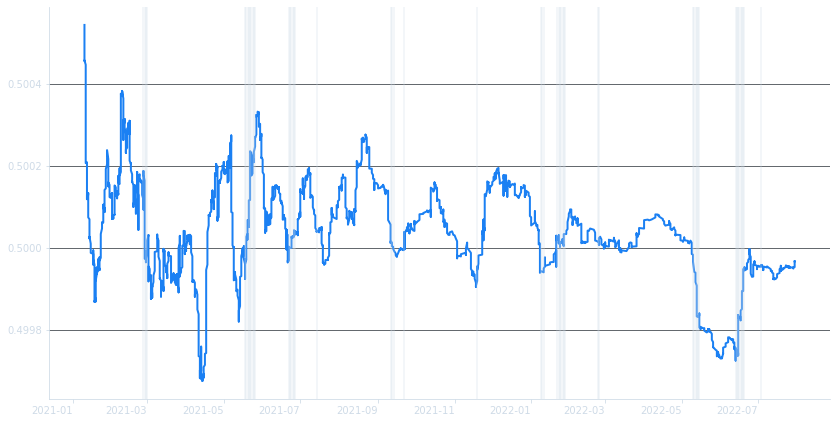

In [92]:
# == UNISWAP V2 ==

# -- convert date to datetime
uni2_df['date'] = pd.to_datetime(uni2_df['date'])

ma = 90 

# -- create moveing average col 
uni2_df['ma'] = uni2_df['%1'].rolling(ma).mean()

# -- plot df    without rotating x labels
ax1 = uni2_df.plot(x='date', y=['ma'], color=['#1B80F3', '#1B80F3'], linewidth=2, figsize=(14, 8), rot=0, legend=False)

bad_days = ['2021-02-26', '2021-02-27', '2021-02-28', '2021-03-01', '2021-05-18',
       '2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22', '2021-05-23',
       '2021-05-24', '2021-05-25', '2021-05-26', '2021-06-22', '2021-06-23',
       '2021-06-24', '2021-06-25', '2021-06-26', '2021-06-27', '2021-07-14',
       '2021-09-11', '2021-09-12', '2021-09-14', '2021-09-22', '2021-11-19',
       '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-22', '2022-01-23',
       '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28',
       '2022-02-23', '2022-02-24', '2022-05-10', '2022-05-11', '2022-05-12',
       '2022-05-13', '2022-05-14', '2022-05-15', '2022-06-13', '2022-06-14',
       '2022-06-15', '2022-06-16', '2022-06-17', '2022-06-18', '2022-06-19',
       '2022-06-20', '2022-07-03']

for bad_day in bad_days:
  ax1.axvline(x = bad_day, color = '#CBD8E5', linestyle = '-', alpha = 0.3) # DCAA2E

#set axis colors to light and remove right and top boarders
ax1.spines['bottom'].set_color('#CFDBE7') 
ax1.spines['left'].set_color('#CFDBE7')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

#change tick colors to match axis color 
ax1.tick_params(axis='x', colors='#CFDBE7',which='both')
ax1.tick_params(axis='y', colors='#CFDBE7',which='both')

#increase length of minor ticks for visability 
ax1.tick_params(axis='x',which='minor',bottom='off')

#format y-axis as dollars 
#fmt = '{0:.1%}' 
#tick = ticker.StrMethodFormatter(fmt)
#ax1.yaxis.set_major_formatter(tick) 

#remove x-axis label thats auto inserted 
ax1.set_xlabel("")
ax1.yaxis.label.set_color('#CFDBE7')

#set gridlines
ax1.grid(axis='y', color='#3D434A')
plt.minorticks_off()

# -- save plot as transparent png
plt.savefig('../charts/stable-stability-uni2.png', transparent=True)

In [43]:
joe_df

date    protocol      chain protocol_version     pool_name token_1  \
0    2021-09-01  Trader Joe  Avalanche               V1  USDC.e/WAVAX  USDC.e   
1    2021-09-02  Trader Joe  Avalanche               V1  USDC.e/WAVAX  USDC.e   
2    2021-09-03  Trader Joe  Avalanche               V1  USDC.e/WAVAX  USDC.e   
3    2021-09-04  Trader Joe  Avalanche               V1  USDC.e/WAVAX  USDC.e   
4    2021-09-05  Trader Joe  Avalanche               V1  USDC.e/WAVAX  USDC.e   
..          ...         ...        ...              ...           ...     ...   
280  2022-07-26  Trader Joe  Avalanche               V1  USDC.e/WAVAX  USDC.e   
281  2022-07-27  Trader Joe  Avalanche               V1  USDC.e/WAVAX  USDC.e   
282  2022-07-28  Trader Joe  Avalanche               V1  USDC.e/WAVAX  USDC.e   
283  2022-07-29  Trader Joe  Avalanche               V1  USDC.e/WAVAX  USDC.e   
284  2022-07-31  Trader Joe  Avalanche               V1  USDC.e/WAVAX  USDC.e   

     token_1_balance  token_1_value_USD token_2  token_2_balance  ...  \
0       1.987823e+07                NaN   WAVAX    469793.540263  ...   
1       2.114881e+07                NaN   WAVAX    442983.107269  ...   
2       1.983344e+07                NaN   WAVAX    434782.788900  ...   
3       1.967428e+07                NaN   WAVAX    415840.405166  ...   
4       1.987641e+07                NaN   WAVAX    413268.940168  ...   
..               ...                ...     ...              ...  ...   
280     4.319127e+06                NaN   WAVAX    208960.440566  ...   
281     4.595919e+06                NaN   WAVAX    196212.003138  ...   
282     4.438740e+06                NaN   WAVAX    183541.385473  ...   
283     4.399308e+06                NaN   WAVAX    179218.917953  ...   
284     4.313517e+06                NaN   WAVAX    181791.151785  ...   

     token_3_balance  token_4  token_4_balance  daily_revenue           TVL  \
0                NaN      NaN              NaN            NaN  3.978871e+07   
1                NaN      NaN              NaN            NaN  4.227891e+07   
2                NaN      NaN              NaN            NaN  3.977452e+07   
3                NaN      NaN              NaN            NaN  3.933938e+07   
4                NaN      NaN              NaN            NaN  3.981518e+07   
..               ...      ...              ...            ...           ...   
280              NaN      NaN              NaN            NaN  8.640541e+06   
281              NaN      NaN              NaN            NaN  9.192362e+06   
282              NaN      NaN              NaN            NaN  8.883361e+06   
283              NaN      NaN              NaN            NaN  8.792611e+06   
284              NaN      NaN              NaN            NaN  8.627522e+06   

     ideal        %1   error 1        %2        MA  
0      NaN  0.499595 -0.000405  0.011807       NaN  
1      NaN  0.500221  0.000221  0.010478       NaN  
2      NaN  0.498647 -0.001353  0.010931       NaN  
3      NaN  0.500117  0.000117  0.010571       NaN  
4      NaN  0.499217 -0.000783  0.010380       NaN  
..     ...       ...       ...       ...       ...  
280    NaN  0.499868 -0.000132  0.024184  0.499725  
281    NaN  0.499971 -0.000029  0.021345  0.499867  
282    NaN  0.499669 -0.000331  0.020661  0.499691  
283    NaN  0.500341  0.000341  0.020383  0.499782  
284    NaN  0.499972 -0.000028  0.021071  0.499876  

[285 rows x 22 columns]

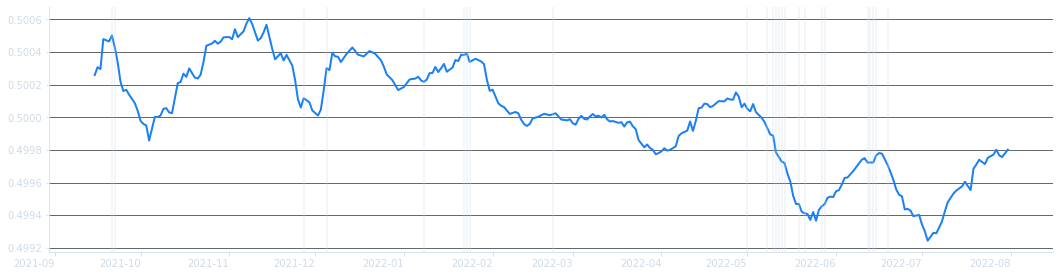

In [85]:
# == JOE ==

# -- convert date to datetime
joe_df['date'] = pd.to_datetime(joe_df['date'])

ma = 14 

# -- create moveing average col 
joe_df['ma'] = joe_df['%1'].rolling(ma).mean()

# -- plot df    without rotating x labels
ax1 = joe_df.plot(x='date', y=['ma'], color=['#1B80F3', '#1B80F3'], linewidth=2, figsize=(18, 5), rot=0, legend=False)

bad_days = [
        '2021-09-21', '2021-09-22',
       '2021-11-27', '2021-12-05', '2022-01-08', '2022-01-22', '2022-01-23',
       '2022-01-24', '2022-02-22', '2022-05-01', '2022-05-08', '2022-05-10',
       '2022-05-11', '2022-05-12', '2022-05-13', '2022-05-14', '2022-05-19',
       '2022-05-21', '2022-05-27', '2022-05-28', '2022-06-12', '2022-06-13',
       '2022-06-14', '2022-06-15', '2022-06-19']

for bad_day in bad_days:
  ax1.axvline(x = bad_day, color = '#CBD8E5', linestyle = '-', alpha = 0.3)

#set axis colors to light and remove right and top boarders
ax1.spines['bottom'].set_color('#CFDBE7') 
ax1.spines['left'].set_color('#CFDBE7')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

#change tick colors to match axis color 
ax1.tick_params(axis='x', colors='#CFDBE7',which='both')
ax1.tick_params(axis='y', colors='#CFDBE7',which='both')

#increase length of minor ticks for visability 
ax1.tick_params(axis='x',which='minor',bottom='off')

#format y-axis as dollars 
#fmt = '{0:.1%}' 
#tick = ticker.StrMethodFormatter(fmt)
#ax1.yaxis.set_major_formatter(tick) 

#remove x-axis label thats auto inserted 
ax1.set_xlabel("")
ax1.yaxis.label.set_color('#CFDBE7')

#set gridlines
ax1.grid(axis='y', color='#3D434A')
plt.minorticks_off()

# -- save plot as transparent png
plt.savefig('../charts/stable-stability-joe.png', transparent=True)

In [47]:
joe_df.columns

Index(['date', 'protocol', 'chain', 'protocol_version', 'pool_name', 'token_1',
       'token_1_balance', 'token_1_value_USD', 'token_2', 'token_2_balance',
       'token_2_value_USD', 'token_3', 'token_3_balance', 'token_4',
       'token_4_balance', 'daily_revenue', 'TVL', 'ideal', '%1', 'error 1',
       '%2', 'MA', 'ma'],
      dtype='object')

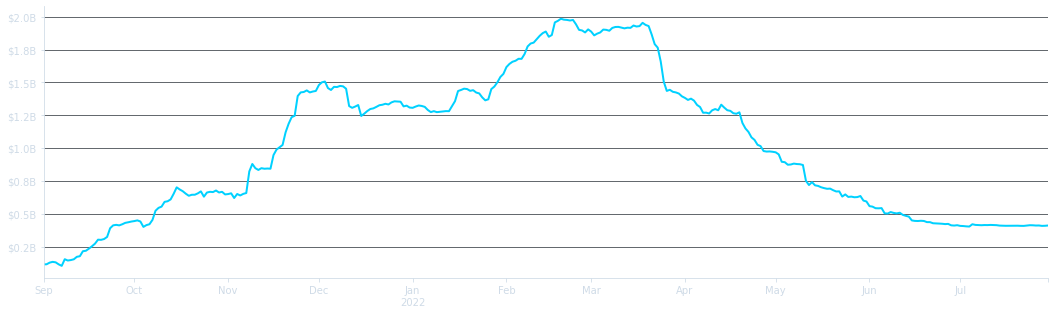

In [89]:
# == JOE ==
joe_usdc_df = pd.read_csv('../../datasets/stables/Kero-Stability-Report/Joe-USDC.csv')
# -- convert date to datetime
joe_usdc_df['date'] = pd.to_datetime(joe_usdc_df['date'])

ma = 14 

# -- create moveing average col 
#joe_usdc_df['ma'] = joe_usdc_df['%1'].rolling(ma).mean()
# -- divide the supply_ntv col by 1 billion
joe_usdc_df['supply_ntv'] = joe_usdc_df['supply_ntv'] / 1000000000


# -- plot df    without rotating x labels
ax1 = joe_usdc_df.iloc[:-1].plot(x='date', y=['supply_ntv'], color=['#00D1FF', '#1B80F3'], linewidth=2, figsize=(18, 5), rot=0, legend=False)


#set axis colors to light and remove right and top boarders
ax1.spines['bottom'].set_color('#CFDBE7') 
ax1.spines['left'].set_color('#CFDBE7')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

#change tick colors to match axis color 
ax1.tick_params(axis='x', colors='#CFDBE7',which='both')
ax1.tick_params(axis='y', colors='#CFDBE7',which='both')

#increase length of minor ticks for visability 
ax1.tick_params(axis='x',which='minor',bottom='off')

#format y-axis as dollars 
fmt = '${x:,.1f}B'
tick = ticker.StrMethodFormatter(fmt)
ax1.yaxis.set_major_formatter(tick) 

#remove x-axis label thats auto inserted 
ax1.set_xlabel("")
ax1.yaxis.label.set_color('#CFDBE7')

#set gridlines
ax1.grid(axis='y', color='#3D434A')
plt.minorticks_off()

# -- save plot as transparent png
plt.savefig('../charts/stable-stability-joe-usdc.png', transparent=True)

In [60]:
uni3_df

date        MA        price  MA_3d_chg  MA_14d_chg  \
0   2021-05-05 00:00:00+00:00       NaN  3245.663149        NaN         NaN   
1   2021-05-05 00:00:00+00:00       NaN  3245.663149        NaN         NaN   
2   2021-05-05 00:00:00+00:00       NaN  3245.663149        NaN         NaN   
3   2021-05-06 00:00:00+00:00       NaN  3524.562728        NaN         NaN   
4   2021-05-06 00:00:00+00:00       NaN  3524.562728        NaN         NaN   
..                        ...       ...          ...        ...         ...   
822 2022-07-29 00:00:00+00:00  0.493826  1723.548521   0.033809    0.067917   
823 2022-07-30 00:00:00+00:00  0.494074  1739.042177   0.015733    0.073550   
824 2022-07-31 00:00:00+00:00  0.494229  1696.785098   0.012802    0.053204   
825 2022-07-31 00:00:00+00:00  0.502067  1696.785098   0.016687    0.080301   
826 2022-07-31 00:00:00+00:00  0.502873  1696.785098   0.017811    0.072867   

     MA_30d_chg  MA_90d_chg  
0           NaN         NaN  
1           NaN         NaN  
2           NaN         NaN  
3           NaN         NaN  
4           NaN         NaN  
..          ...         ...  
822    0.084616    0.366785  
823    0.089652    0.352987  
824    0.080243    0.342353  
825    0.124034    0.384095  
826    0.123895    0.388073  

[827 rows x 7 columns]

In [61]:
uni3_df['date'] = pd.to_datetime(uni3_df['date'])
uni3_df.set_index('date', inplace=True)
uni3_df.index = uni3_df.index.tz_localize(None)

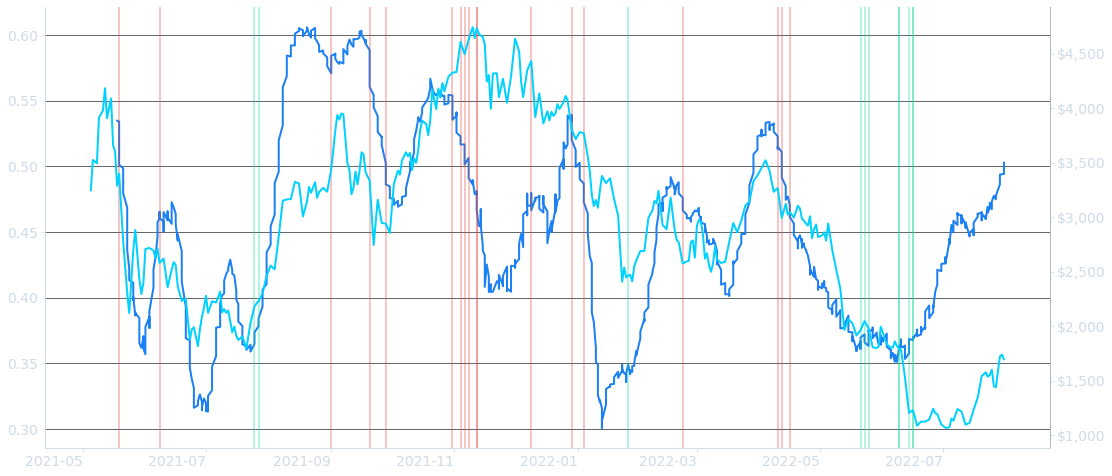

In [105]:
ax1 = uni3_df['MA'].plot(kind = 'line', c = '#1B80F3', figsize = (18,9), legend = False, rot=0, fontsize=14,linewidth=2)
ax2 = uni3_df['price'].plot(kind = 'line', c = '#00D1FF', rot=0, secondary_y=True, ax = ax1, fontsize=14, linewidth=2)

# -- plot horizonatal 
#ax.axhline(y = 0.5, color = 'black', linestyle = '--')

# -- plot 3d -5% USDC balance drawdowns 
bad_days = ['2021-05-19',
               '2021-06-08', '2021-09-01', '2021-09-20', '2021-09-28', '2021-10-31',
               '2021-11-04', '2021-11-06', '2021-11-08', '2021-11-12',
               '2021-11-12', '2021-12-09', '2021-12-29', '2022-01-04',
               '2022-02-22', '2022-04-10', '2022-04-12', '2022-04-16']
for bad_day in bad_days:
  ax1.axvline(x = bad_day, color = '#E84142', linestyle = '-', alpha = 0.4)

# -- plot good days 


good_days = ['2021-07-25', '2021-07-27', '2022-01-26', '2022-05-21',
               '2022-05-23', '2022-05-25', '2022-06-09', '2022-06-09',
               '2022-06-14', '2022-06-16', '2022-06-16']

for good_day in good_days:
  ax1.axvline(x = good_day, color = '#0CDA97', linestyle = '-', alpha = 0.4)

#set axis colors to light and remove right and top boarders
ax1.spines['bottom'].set_color('#CFDBE7') 
ax1.spines['left'].set_color('#CFDBE7')

ax1.spines['right'].set_visible('#CFDBE7')
ax1.spines['top'].set_visible(False)

#change tick colors to match axis color 
ax1.tick_params(axis='x', colors='#CFDBE7',which='both')
ax1.tick_params(axis='y', colors='#CFDBE7',which='both')

#increase length of minor ticks for visability 
ax1.tick_params(axis='x',which='minor',bottom='off')

#format y-axis as dollars 
#fmt = '{0:.1%}' 
#tick = ticker.StrMethodFormatter(fmt)
#ax1.yaxis.set_major_formatter(tick) 

#remove x-axis label thats auto inserted 
ax1.set_xlabel("")
ax1.yaxis.label.set_color('#CFDBE7')

#set gridlines
ax1.grid(axis='y', color='#3D434A')
plt.minorticks_off()


# -=====

#set axis colors to light and remove right and top boarders
ax2.spines['bottom'].set_color('#CFDBE7') 
ax2.spines['left'].set_color('#CFDBE7')

ax2.spines['right'].set_color('#CFDBE7')
ax2.spines['top'].set_visible(False)

#change tick colors to match axis color 
ax2.tick_params(axis='x', colors='#CFDBE7',which='both')
ax2.tick_params(axis='y', colors='#CFDBE7',which='both')

#increase length of minor ticks for visability 
ax2.tick_params(axis='x',which='minor',bottom='off')

#format y-axis as dollars 
fmt = '${x:,.0f}'
tick = ticker.StrMethodFormatter(fmt)
ax2.yaxis.set_major_formatter(tick) 

#remove x-axis label thats auto inserted 
ax2.set_xlabel("")
ax2.yaxis.label.set_color('#CFDBE7')

#set gridlines
ax2.grid(False)
plt.minorticks_off()

# -- save plot as transparent png
plt.savefig('../charts/stable-stability-univ3.png', transparent=True)